# Handwritten Digits Recognition Tutorial

## What is TensorFlow?

<img src="https://camo.githubusercontent.com/c04e16c05de80dadbdc990884672fc941fdcbbfbb02b31dd48c248d010861426/68747470733a2f2f7777772e74656e736f72666c6f772e6f72672f696d616765732f74665f6c6f676f5f736f6369616c2e706e67" alt="TensorFlow Logo" width="200"/>

TensorFlow is a Python-friendly open source library for numerical computation that makes machine learning faster and easier.

In [86]:
import tensorflow as tf # pip install tensorflow

## Loading - MNIST* Data Set

##### *MNIST = Modified National Institute of Standards and Technology 

### Contains Training Samples = 60,000 , Testing Samples 10,000

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/480px-MnistExamples.png" alt="Sample Image from MNIST Data Set" width="400"/>

#### Tensorflow already has MNIST data set which can be loaded using Keras (TF's API)

In [55]:
#handwritten chars based on 28x28 images of 0 to 9
mnist = tf.keras.datasets.mnist 

## Divide into Train, Test Datasets

In [56]:
## unpacking dataset into train and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [57]:
## 60,000 TRAINING samples of 28x28 images
x_train.shape

(60000, 28, 28)

In [58]:
## 60,000 TESTING samples of 28x28 images
x_test.shape

(10000, 28, 28)

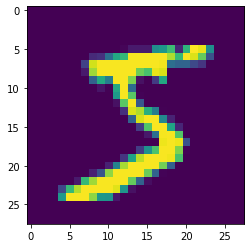

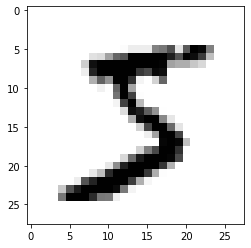

In [59]:
import matplotlib.pyplot as plt # pip install matplotlib

## checking the graph for data
plt.imshow(x_train[0]) # display 1st data on image with 2D regular raster
plt.show() # in order to show the graph

plt.imshow(x_train[0], cmap = plt.cm.binary) # color map = binary INVERTED
plt.show()

## Check Value of Each Pixel Before Normalisation

### Each pixel has a color value from 0 to 255
##### 0 Black, 255 White

<img src="https://929687.smushcdn.com/2407837/wp-content/uploads/2020/12/opencv_getting_setting_color_examples.png?lossy=1&strip=1&webp=0" alt="Color Scale" width="200" align = "left"/>

In [60]:
print(x_train[0]) ## before normalisation

# you see > 0 for the pixels here, cm.binary INVERTED the colors for the graph
# Since its 1 channel of 0 to 255, it is on GRAYSCALE, not COLORED (RGB)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Normalizing the Data | Pre-Processing Step

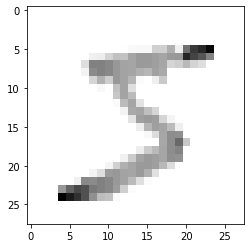

In [61]:
# manual way: x/255, so 0 or 1
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

## After Normalisation

In [62]:
# all values are from 0 to 1
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [63]:
# x_train has data, y_train is the label
print(y_train[0])

5


## Image Reize for Convolution Operations

In [73]:
import numpy as np # pip install numpy
IMG_SIZE = 28

## To perform convolution operations, need one extra dimension
## increasing one dimension for kernel operation

# 60k x 28 x 28 x 1
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 

# 10k x 28 x 28 x 1
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
 
print("Training Samples dimension", x_trainr.shape)
print("Training Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Training Samples dimension (10000, 28, 28, 1)


## Creating a Deep Neural Network
### Training on 60,000 samples of MNIST handwritten dataset

In [74]:
# Sequential connects deep learning layers 
# E.g. Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [75]:
## Create neural network 
model = Sequential()

## First Convolution Layer 0 1 2 3 (60,000, 28, 28 ,1)

# 64 - No. of filters are 64 - dimensionality of the output space
# (3,3) - 3,3 is the height and width of the convolution window
# input_shape - only need single image 28,28,1 and not the 60,000 hence 1:
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))

## relu - Rectified Linear Unit
## to make it non-linear, < 0 will drop, > 0 move to second layer
## outputs input directly to 0 if negative
model.add(Activation("relu")) 

## Max Pooling operation for 2D spatial data
## pool_size - max size of 2x2 pooling window, single maximum value
model.add(MaxPooling2D(pool_size=(2,2))) 

## Second Convolution Layer
model.add(Conv2D(64, (3,3))) ## 2nd layer
model.add(Activation("relu")) ## activation function
model.add(MaxPooling2D(pool_size=(2,2)))

## Third Convolution Layer
model.add(Conv2D(64, (3,3))) ## 3rd layer
model.add(Activation("relu")) ## activation function
model.add(MaxPooling2D(pool_size=(2,2)))

## FULL Connected Layer 1 

# Flatten so that 2D layer becomes 1D
model.add(Flatten()) 
# Neural Network Layer with 64 connected neurons
model.add(Dense(64))
model.add(Activation("relu"))

## FULL Connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

## LAST Connected Layer - MUST be equal to number of classes - 10 (0-9)
model.add(Dense(10)) # Last Dense Layer == 10
model.add(Activation("softmax")) ## Changed to Softmax (Class Probabilities)

# E.g. Binary Classification 0 or 1, one neuron in Dense Layer, sigmoid activation

# Multiple Layers and Classes, softmax is the best for classification

In [76]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_8 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)         

In [77]:
print("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [78]:
# Model Combination before Training

# .compile() - Configures model for training
""" 
# loss - Loss Function: determine how far predicted values deviate 
from actual values in training data

- Use sparse_categorical_crossentropy when your classes are mutually exclusive.
- Use categorical crossentropy when one sample can have multiple classes 
or labels are soft probabilities (like [0.5, 0.3, 0.2])
"""

# optimizer - Optimizer instance. 
"""
Adam optimization is a stochastic gradient descent method that is 
based on adaptive estimation of first-order and second-order moments.
Well suited for problems that are large in terms of data/parameters".
"""

# metrics - list of metrics to be evaluated by model during training and test
# accuracy - How often prediction = labels
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "adam", 
              metrics = ['accuracy'])

In [79]:
#Training the Model

# .fit() - trains the model for a fix number of epcohs (iterations)
# 1 epoch = 1 iteration over the whole x and y data
# validation_split - Float between 0 and 1
"""
Fraction of training data to be used as validation data
E.g. 0.3 means 30% used a validation, 70% training"""
model.fit(x_trainr, y_train, epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.3496 - accuracy: 0.8870 - val_loss: 0.1210 - val_accuracy: 0.9624
Epoch 2/5
1313/1313 [==============================] - 28s 22ms/step - loss: 0.1112 - accuracy: 0.9664 - val_loss: 0.1007 - val_accuracy: 0.9688
Epoch 3/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0807 - accuracy: 0.9749 - val_loss: 0.0731 - val_accuracy: 0.9781
Epoch 4/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0655 - accuracy: 0.9802 - val_loss: 0.0761 - val_accuracy: 0.9775
Epoch 5/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0514 - accuracy: 0.9835 - val_loss: 0.0785 - val_accuracy: 0.9771


##### Best if val_accuracy => (almost equal) accuracy

##### If accuracy is high but < val_accuracy, OVERFITTING
* E.g. accuracy = 90%, val_accuracy = 30%
* Overdoing the network
* Solution will be the dropout layer

In [82]:
## Evaluate on test data set MNIST
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.0698 - accuracy: 0.9802
Test loss on 10,000 test samples 0.06983877718448639
Validation Accuracy on 10,000 test samples 0.9801999926567078


In [84]:
# Predictions
predictions = model.predict([x_testr])

# Has many class probabilities from softmax earlier on
print(predictions)

[[1.79808239e-08 2.26404918e-05 2.27484998e-06 ... 9.99944329e-01
  1.33740656e-07 7.59862905e-06]
 [2.19474896e-06 8.57490591e-07 9.99993205e-01 ... 1.02585238e-06
  2.37970266e-06 1.29320856e-08]
 [6.11711997e-08 9.99999166e-01 1.54709340e-07 ... 1.09123306e-07
  8.17093166e-08 3.21635873e-08]
 ...
 [1.05976449e-06 1.69202337e-06 2.84342576e-07 ... 4.71665857e-07
  1.76510497e-04 1.12642469e-04]
 [1.29987639e-05 4.50214657e-08 1.84491911e-09 ... 2.93665732e-08
  1.10464366e-02 1.20781087e-05]
 [7.56639784e-05 6.76460422e-06 3.22828928e-05 ... 7.16562383e-08
  5.37444931e-03 1.01611895e-05]]


In [88]:
#conversion of predictions using numpy from softmax 

#argmax will return max value index and find the value of it

#From all the 10,000 datasets, choose the one at index 0
print(np.argmax(predictions[0]))

7


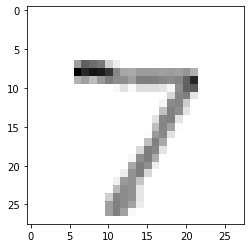

In [91]:
### now to check if the answer is true or not
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()

In [93]:
#conversion of predictions using numpy from softmax 

#argmax will return max value index and find the value of it

# index 0 to 99999
print(np.argmax(predictions[9999]))

6


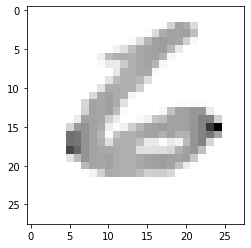

In [94]:
### now to check if the answer is true or not
plt.imshow(x_test[9999], cmap = plt.cm.binary)
plt.show()

## Checking Predictions

5


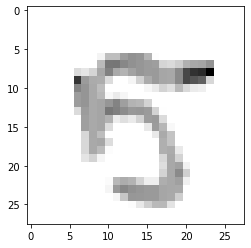

In [96]:
# Prediction Checker
x = 2001

print(np.argmax(predictions[x]))

### now to check if the answer is true or not
plt.imshow(x_test[x], cmap = plt.cm.binary)
plt.show()

## Importing own digits with CV2

In [97]:
import cv2 ## pip install opencv-python

In [112]:
## Lods image from specified file, returns image loaded from specified file
img = cv2.imread('eight.png')

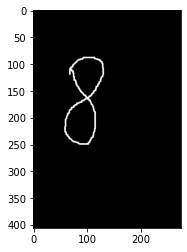

In [113]:
plt.imshow(img)

In [114]:
# returns tuple (#rows, #columns, #color channels 3 means color)
img.shape

(406, 275, 3)

In [120]:
# cv2.cvtColor() method is used to convert an image from one color space to another. Returns the re-colored image

# since image is on a color plane, need to convert to gray

# img - image whose color is to be changed
# cv2.COLOR_BGR2GRAY - color space conversion code
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [121]:
# returns tuple (#rows, #columns, #color channels, no return means grayscale)
gray.shape

(406, 275)

In [122]:
# Resizing an image means changing the dimensions of it, be it width alone, height alone or changing both of them.

# gray - image to resize
# (28,28) - desired size of the output image
# cv2.INTER_AREA - resampling using pixel area relation. 
#                  It may be a preferred method for image decimation, as it gives moire’-free results
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [123]:
resized.shape

(28, 28)

In [124]:
# Before giving this image for prediction, need to normalize the image
new_img = tf.keras.utils.normalize(resized, axis = 1) # 0 to 1 scaling

In [125]:
new_img = np.array(new_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # kernel operation of convolution layer

In [126]:
new_img.shape

(1, 28, 28, 1)

In [127]:
#model is trained already
predictions=model.predict(new_img)

In [128]:
print(np.argmax(predictions))

8


## Video Recognition

In [144]:
import numpy as np
font_scale = 2.0
font = cv2.FONT_HERSHEY_PLAIN

cap = cv2.VideoCapture("WriteMyNumbers.mp4")

# Check if opened correctly for webcam
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Video!")
    
text = "Test"

# Width and Height of Text Box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]

# Set text Start Position 
text_offset_x = 10
text_offset_y = img.shape[0] - 25

# Coord of bax small padding
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 3, text_offset_y - text_height - 3))

cntr = 0;

while True:
    # read the video frame by frame
    ret, frame = cap.read()
    cntr = cntr + 1;
    ## skipping one image
    if ((cntr % 10) == 0):
        
        # 1. Convert img into grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # 2. Resize img into 28,28
        resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
        
        # 3. Normaize pixel axis from 0 - 255 to 0 - 1
        new_img = tf.keras.utils.normalize(resized, axis = 1)
        
        # 4. Reshape img
        new_img = np.array(new_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        
        # 5. Use trained model to predict img
        predictions = model.predict(new_img)
        
        # 6. Return max value index, find predicted label value
        status = np.argmax(predictions)
        
        print(status)
        print(type(status))
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        # Background Rectangle
        # (B,G,R)
        cv2.rectangle(frame, (x1,y1), (x1 + w1, y1 + h1), (0,255,0), 2)
        
        # Add Text
        cv2.putText(frame, status.astype(str), (x1 + int(w1/5), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.imshow('HandWritten Digits Recognition', frame)
        
        # Press q to quit
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
2
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
8
<class 'numpy.int64'>
8
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
8
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.

1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
6
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
6
<class 'numpy.int64'>
0
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
0
<class 'numpy.int64'>
2
<class 'numpy.int64'>
8
<class 'numpy.int64'>
4
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
6
<class 'numpy.int64'>
1
<class 'numpy.

0
<class 'numpy.int64'>
2
<class 'numpy.int64'>
8
<class 'numpy.int64'>
4
<class 'numpy.int64'>
8
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
0
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
8
<class 'numpy.int64'>
8
<class 'numpy.int64'>
8
<class 'numpy.int64'>
8
<class 'numpy.int64'>
8
<class 'numpy.int64'>
8
<class 'numpy.int64'>
8
<class 'numpy.int64'>
8
<class 'numpy.int64'>
8
<class 'numpy.int64'>
8
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
